In [4]:
import numpy as np
import torch
from modules.preprocessing import BRATSDataModule

from omegaconf import OmegaConf

cfg = OmegaConf.load('./config.yaml')

dm = BRATSDataModule(**cfg.data.first_stage, slice_idx=32)
dm.prepare_data()
dm.setup()

Dataset already exists at ./data/brats_preprocessed.npy
Loading dataset from npy file...


AttributeError: 'BRATSDataModule' object has no attribute 'slice_positions'

Loading dataset from npy file...


AttributeError: 'BRATSDataModule' object has no attribute 'slice_positions'

In [9]:
data = (data - data.min()) / (data.max() - data.min())
data.min(), data.max()

(1.0, 0.0)

In [9]:
norm = lambda data: data * 2 / data.max() - 1
for m in range(2):
    for idx in range(500):
        data[idx, m] = norm(data[idx, m]).astype(np.float32)

In [10]:
data.min()

-1.0179553031921387

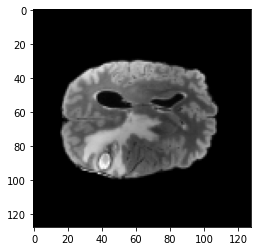

In [13]:
import matplotlib.pyplot as plt

plt.imshow(data[0, 0, :, :, 32], cmap='gray')

In [1]:
import torch
from modules.ddpm import DDPM
from modules.diffusion import Diffusion
from modules.sampler import ScheduleSampler
from omegaconf import OmegaConf

cfg = OmegaConf.load('./config.yaml')

diffusion = Diffusion(**cfg.diffusion)
sampler = ScheduleSampler(
    T=cfg.diffusion.T,
    batch_size=cfg.data.diffusion.batch_size,
    sampler=cfg.diffusion.schedule_sampler,
    memory_span=cfg.diffusion.loss_memory_span
)

ddpm = DDPM(
    unet_config = cfg.unet,
    diffusion   = diffusion,
    sampler     = sampler,
    use_ema     = True,
    clamp       = True  
).to('cuda')

Keeping EMAs of 400.


In [2]:
ddpm.sample_img(n_samples=1).shape

Sampling: 100%|██████████| 1000/1000 [00:56<00:00, 17.74it/s]


torch.Size([1, 4, 256, 256])

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
ae = ae.to(device)

x = torch.randn(4, 2, 64, 64).to(device, dtype=torch.float32)
t = torch.randint(0, 64, (4,)).to(device, dtype=torch.long)

o = ae(x, t)

In [35]:
import torch

# Create a tensor of shape (2, 3, 4)
x = torch.randn(2, 3, 4)

# Reshape the tensor to shape (2, 4, 3)
y = x.reshape(2, 4, 3)

# View and permute the tensor to shape (2, 4, 3)
z = x.view(2, 3, 4).permute(0, 2, 1)

# Check if y and z are equal
print(torch.allclose(y, z))

False


In [30]:
mean = z.mean()
var = z.var()

log_likelihood = (-4 / 2) * torch.log(2 * torch.tensor(np.pi)) - 0.5 * z.sum() ** 2

In [31]:
log_likelihood

tensor(-7.0451)